##Taciana Alessandra Gomes Cruz

*Patient B



In [24]:
#Upload the sample_data from una_health_data_challenge

!mkdir -p sample_data/una_health_data_challenge/
!wget https://s3-de-central.profitbricks.com/una-health-data-challenge/una-health-data-challenge.zip -P sample_data/una_health_data_challenge/
!unzip /content/sample_data/una_health_data_challenge/una-health-data-challenge.zip -d sample_data/una_health_data_challenge/

--2021-11-10 07:37:19--  https://s3-de-central.profitbricks.com/una-health-data-challenge/una-health-data-challenge.zip
Resolving s3-de-central.profitbricks.com (s3-de-central.profitbricks.com)... 81.173.115.248
Connecting to s3-de-central.profitbricks.com (s3-de-central.profitbricks.com)|81.173.115.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27737 (27K) [application/zip]
Saving to: ‘sample_data/una_health_data_challenge/una-health-data-challenge.zip.1’

una-health-data-cha 100%[===================>]  27.09K  --.-KB/s    in 0s      

2021-11-10 07:37:20 (227 MB/s) - ‘sample_data/una_health_data_challenge/una-health-data-challenge.zip.1’ saved [27737/27737]

Archive:  /content/sample_data/una_health_data_challenge/una-health-data-challenge.zip
replace sample_data/una_health_data_challenge/aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa/activities_all.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_data/una_health_data_challenge/aaaaaaaa-aaaa-aaaa-

In [25]:
# Patient B
# df_p_a_meals :
# df_p_a_blood_glucose : 

import pandas as pd
df_p_a_meals = pd.read_csv('/content/sample_data/una_health_data_challenge/aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa/activities_all.csv')
df_p_b_meals = pd.read_csv('/content/sample_data/una_health_data_challenge/bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb/activities_all.csv')
df_p_c_meals = pd.read_csv('/content/sample_data/una_health_data_challenge/cccccccc-cccc-cccc-cccc-cccccccccccc/activities_all.csv')

df_p_a_blood_glucose = pd.read_csv('/content/sample_data/una_health_data_challenge/aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa/levels_all.csv',skiprows=1)
df_p_b_blood_glucose = pd.read_csv('/content/sample_data/una_health_data_challenge/bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb/levels_all.csv',skiprows=1)
df_p_c_blood_glucose = pd.read_csv('/content/sample_data/una_health_data_challenge/cccccccc-cccc-cccc-cccc-cccccccccccc/levels_all.csv',skiprows=1)

df_p_a_meals = df_p_b_meals
df_p_a_blood_glucose = df_p_b_blood_glucose

In [26]:
# making the datatimes from both dfs equals
import datetime as dt

df_p_a_meals["timestamp_start"] = pd.to_datetime(df_p_a_meals["timestamp_start"])
df_p_a_meals["timestamp_start"] = df_p_a_meals["timestamp_start"].dt.strftime('%d-%m-%Y %H:%M')
df_p_a_meals["timestamp_start"]

0     19-02-2021 06:30
1     19-02-2021 07:30
2     19-02-2021 09:00
3     19-02-2021 10:00
4     19-02-2021 12:45
5     19-02-2021 15:30
6     19-02-2021 19:30
7     19-02-2021 23:00
8     21-02-2021 06:00
9     21-02-2021 12:45
10    21-02-2021 18:15
11    21-02-2021 22:00
12    23-02-2021 07:00
13    23-02-2021 12:30
14    23-02-2021 15:15
15    23-02-2021 18:30
16    23-02-2021 22:15
Name: timestamp_start, dtype: object

In [27]:
df_p_a_blood_glucose["Gerätezeitstempel"]

0       18-02-2021 11:19
1       18-02-2021 11:34
2       18-02-2021 11:49
3       18-02-2021 12:04
4       18-02-2021 12:19
              ...       
1364    18-02-2021 10:04
1365    18-02-2021 10:19
1366    18-02-2021 10:34
1367    18-02-2021 10:49
1368    18-02-2021 11:04
Name: Gerätezeitstempel, Length: 1369, dtype: object

In [28]:
# Count all Aufzeichnungstyp types
df_p_a_blood_glucose["Aufzeichnungstyp"].sort_index().value_counts().head()

0    1255
1      72
6      41
5       1
Name: Aufzeichnungstyp, dtype: int64

In [29]:
import numpy as np

# adding extra columns in df_p_a_meals to make the analysis easier

df_p_a_meals["datatime_before"] = np.nan
df_p_a_meals["datatime_after"] = np.nan
df_p_a_meals["Aufzeichnungstyp_before"] = np.nan
df_p_a_meals["Aufzeichnungstyp_after"] = np.nan
df_p_a_meals["Glukose_before"] = np.nan
df_p_a_meals["Glukose_after"] = np.nan

In [30]:
# removing columns in df_p_a_meals that we will not be using
df_p_a_meals.columns
df_p_a_meals = df_p_a_meals.drop(columns=['payload', 'created','last_modified','timestamp_end'])
df_p_a_meals.columns

Index(['id', 'user_id', 'record_type', 'description', 'timestamp_start',
       'datatime_before', 'datatime_after', 'Aufzeichnungstyp_before',
       'Aufzeichnungstyp_after', 'Glukose_before', 'Glukose_after'],
      dtype='object')

In [31]:
#functions

def filtered_data(filtered_dates, time_meal):
  filtered_data = filtered_dates["Gerätezeitstempel"] == time_meal
  return filtered_dates[filtered_data]

In [32]:
def insert_values(i, df_p_a_meals, filtered_patient_data):
  df_p_a_meals['datatime_after'][i] = np.sort(filtered_patient_data['Gerätezeitstempel'])[0]
  aufzeichnungstyp_value = (np.sort(filtered_patient_data['Aufzeichnungstyp'])[0])
  df_p_a_meals['Aufzeichnungstyp_after'][i] = aufzeichnungstyp_value

  if aufzeichnungstyp_value == 0:
    df_p_a_meals['Glukose_after'][i] = (np.sort(filtered_patient_data['Glukosewert-Verlauf mg/dL'])[0])

  if aufzeichnungstyp_value == 1:
    df_p_a_meals['Glukose_after'][i] = (np.sort(filtered_patient_data['Glukose-Scan mg/dL'])[0])


In [33]:
def filtered_by_dates(df_p_a_blood_glucose, start_date_min, start_date_max):  
  after_start_date = pd.to_datetime(df_p_a_blood_glucose["Gerätezeitstempel"])>= start_date_min
  before_end_date = pd.to_datetime(df_p_a_blood_glucose["Gerätezeitstempel"])<= start_date_max

  between_two_dates = after_start_date & before_end_date
  filtered_dates = df_p_a_blood_glucose.loc[between_two_dates]

  return filtered_dates

In [34]:
df_p_a_blood_glucose = df_p_a_blood_glucose[(df_p_a_blood_glucose.Aufzeichnungstyp <= 1)]
# Count all Aufzeichnungstyp types
df_p_a_blood_glucose["Aufzeichnungstyp"].sort_index().value_counts().head()

0    1255
1      72
Name: Aufzeichnungstyp, dtype: int64

In [35]:
import datetime as dt
import datetime
from datetime import datetime, timedelta

for i in range(0, len(df_p_a_meals)):

  # Measure Glicose before the meal, considering the closest measure

  # Initial time minus 15 minutes to search for the closest lunch measure
  start_date = pd.to_datetime(df_p_a_meals["timestamp_start"][i])
  final_date = pd.to_datetime(df_p_a_meals["timestamp_start"][i]) - timedelta(minutes=30)

  # List closest measures
  filtered_dates_before = filtered_by_dates(df_p_a_blood_glucose, final_date, start_date)  

  # Glicose measure after the meal
  # Initial time plus 3 hours 

  start_date = pd.to_datetime(df_p_a_meals["timestamp_start"][i]) + timedelta(hours = 3)
  end_date = pd.to_datetime(df_p_a_meals["timestamp_start"][i]) + timedelta(hours = 3, minutes = 30)

  # Take the close to the end measure of the meal considering 3 hours after the beginning of the meail until 30 minutes after
  filtered_dates_after = filtered_by_dates(df_p_a_blood_glucose, start_date, end_date) 

  if( not filtered_dates_after.empty and not filtered_dates_before.empty):

    # BEFORE....................................................................
    
    # Glicose measure nearest the beginning of the meal
    before_meal = max(filtered_dates_before["Gerätezeitstempel"])

    filtered_patient_data_before = filtered_data(filtered_dates_before, before_meal)

    # Adding values into the df_p_a_meals - BEFORE

    df_p_a_meals['datatime_before'][i] = np.sort(filtered_patient_data_before['Gerätezeitstempel'])[0]
    df_p_a_meals['Aufzeichnungstyp_before'][i] = filtered_patient_data_before['Aufzeichnungstyp']
    aufzeichnungstyp_value = (np.sort(filtered_patient_data_before['Aufzeichnungstyp'])[0])

    if aufzeichnungstyp_value == 0:
      df_p_a_meals['Glukose_before'][i] = filtered_patient_data_before['Glukosewert-Verlauf mg/dL']
    if aufzeichnungstyp_value == 1:
      df_p_a_meals['Glukose_before'][i] = filtered_patient_data_before['Glukose-Scan mg/dL']

    # AFTER....................................................................

    # Closest glicose measure after 3 hours of meal
    after_meal = min(filtered_dates_after["Gerätezeitstempel"])

    patient_filtered_data_after = filtered_data(filtered_dates_after, after_meal)

    # Adding values into the df_p_a_meals - AFTER
    insert_values(i, df_p_a_meals, patient_filtered_data_after)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41:

In [36]:
# dataframe with all values done
df_p_a_meals

,id,user_id,record_type,description,timestamp_start,datatime_before,datatime_after,Aufzeichnungstyp_before,Aufzeichnungstyp_after,Glukose_before,Glukose_after
0,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb00,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_BREAKFAST,2 Pott Kaffe +Zucker,19-02-2021 06:30,19-02-2021 06:29,19-02-2021 09:44,0.0,0.0,148.0,148.0
1,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb01,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_BREAKFAST,Gem�sesuppe instant,19-02-2021 07:30,19-02-2021 07:29,19-02-2021 10:44,0.0,0.0,149.0,107.0
2,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb02,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,Gem�sesuppe instant + Gr�ner Tee ohne alles,19-02-2021 09:00,19-02-2021 08:59,19-02-2021 12:00,0.0,0.0,136.0,104.0
3,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb03,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,DRINK,Kaffee ohne alles,19-02-2021 10:00,19-02-2021 09:59,19-02-2021 13:00,0.0,0.0,121.0,104.0
4,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb04,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_LUNCH,"Kartoffeln (150 g), Quark 250 g, Bohnen 250g ,...",19-02-2021 12:45,19-02-2021 12:45,19-02-2021 15:45,0.0,0.0,101.0,148.0
5,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb05,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,"kaffee und etwas zucker, scheibe Brot mit L�tt...",19-02-2021 15:30,19-02-2021 15:30,19-02-2021 18:32,0.0,0.0,138.0,92.0
6,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb06,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_DINNER,currywurst und 2 scheiben Brot,19-02-2021 19:30,19-02-2021 19:17,19-02-2021 22:35,0.0,0.0,91.0,144.0
7,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb07,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,"Brot mit L�tta, Salami, 2 Kekse Prinzenrolle",19-02-2021 23:00,19-02-2021 22:50,20-02-2021 02:05,0.0,0.0,133.0,140.0
8,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb08,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_BREAKFAST,2 Kaffee mit etwas Zucker,21-02-2021 06:00,21-02-2021 05:48,21-02-2021 09:03,0.0,0.0,124.0,108.0
9,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb09,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_LUNCH,"1/4 Ente 250 g, etw. Rotkohl 200g, 50 mlOrange...",21-02-2021 12:45,21-02-2021 12:35,21-02-2021 15:50,0.0,0.0,87.0,112.0


In [37]:
df_p_a_meals =  df_p_a_meals.dropna()
df_p_a_meals

,id,user_id,record_type,description,timestamp_start,datatime_before,datatime_after,Aufzeichnungstyp_before,Aufzeichnungstyp_after,Glukose_before,Glukose_after
0,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb00,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_BREAKFAST,2 Pott Kaffe +Zucker,19-02-2021 06:30,19-02-2021 06:29,19-02-2021 09:44,0.0,0.0,148.0,148.0
1,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb01,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_BREAKFAST,Gem�sesuppe instant,19-02-2021 07:30,19-02-2021 07:29,19-02-2021 10:44,0.0,0.0,149.0,107.0
2,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb02,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,Gem�sesuppe instant + Gr�ner Tee ohne alles,19-02-2021 09:00,19-02-2021 08:59,19-02-2021 12:00,0.0,0.0,136.0,104.0
3,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb03,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,DRINK,Kaffee ohne alles,19-02-2021 10:00,19-02-2021 09:59,19-02-2021 13:00,0.0,0.0,121.0,104.0
4,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb04,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_LUNCH,"Kartoffeln (150 g), Quark 250 g, Bohnen 250g ,...",19-02-2021 12:45,19-02-2021 12:45,19-02-2021 15:45,0.0,0.0,101.0,148.0
5,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb05,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,"kaffee und etwas zucker, scheibe Brot mit L�tt...",19-02-2021 15:30,19-02-2021 15:30,19-02-2021 18:32,0.0,0.0,138.0,92.0
6,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb06,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_DINNER,currywurst und 2 scheiben Brot,19-02-2021 19:30,19-02-2021 19:17,19-02-2021 22:35,0.0,0.0,91.0,144.0
7,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb07,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,"Brot mit L�tta, Salami, 2 Kekse Prinzenrolle",19-02-2021 23:00,19-02-2021 22:50,20-02-2021 02:05,0.0,0.0,133.0,140.0
8,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb08,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_BREAKFAST,2 Kaffee mit etwas Zucker,21-02-2021 06:00,21-02-2021 05:48,21-02-2021 09:03,0.0,0.0,124.0,108.0
9,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb09,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_LUNCH,"1/4 Ente 250 g, etw. Rotkohl 200g, 50 mlOrange...",21-02-2021 12:45,21-02-2021 12:35,21-02-2021 15:50,0.0,0.0,87.0,112.0


#Analisys of the dataset patient B

First of all, I would like to express that due to lack of data, I could not go deeper into the analyses. But I decided to work mainly with the means in each type of a meal and the correlation between glucose before and after.

Probably to observe a correlational behavior between features of this nature, we would need more data. However, with those presented for Patient B, it was not possible to observe any correlation between them, because the correlation index is equal to -0.06.

Through a simple and brief analysis of means and difference between means by meal category. We can observe that:

1. that DRINK and SNACK were the most significant for lowering blood glucose. Presenting an average difference of 17 points for DRINK and 11 points for MEAL_SNACK.

2. MEAL_DINNER and MEAL_LUNCH had the worst rates leading to a significant increase in glucose in the averages of these meals. With 46.5 points increase for MEAL_DINNER and 29 points for MEAL_LUNCH.

General Note: For a recommendation algorithm based on each patient's routine. It would be valid for this patient to start restructuring the MEAL_DINNER and MEAL_LUNCH because they had the greatest impacts on the glucose rise in this patient.




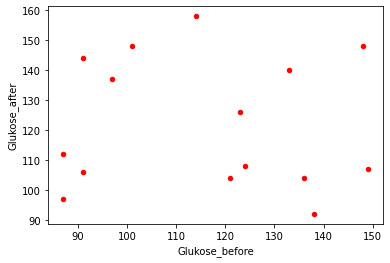

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing 
df_p_a_meals.plot(kind='scatter',x='Glukose_before',y='Glukose_after',color='red')
plt.show()

In [39]:
meals_type = (df_p_a_meals["record_type"].unique())
meals_type

array(['MEAL_BREAKFAST', 'MEAL_SNACK', 'DRINK', 'MEAL_LUNCH',
       'MEAL_DINNER'], dtype=object)

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

print("Glicose mean of the patient A according with meal category")

for i in range(0, len(meals_type)):
  print("\n")
  print("Mean of ",meals_type[i])

  mean_before = sum(df_p_a_meals[df_p_a_meals.record_type == meals_type[i]].Glukose_before)/len(df_p_a_meals[df_p_a_meals.record_type == meals_type[i]].Glukose_before)
  mean_after = sum(df_p_a_meals[df_p_a_meals.record_type == meals_type[i]].Glukose_after)/len(df_p_a_meals[df_p_a_meals.record_type == meals_type[i]].Glukose_after)
  
  print("Before :", mean_before)
  print("After: ", mean_after)
  print("Difference: ", mean_before - mean_after)



Glicose mean of the patient A according with meal category


Mean of  MEAL_BREAKFAST
Before : 133.75
After:  130.25
Difference:  3.5


Mean of  MEAL_SNACK
Before : 123.4
After:  111.8
Difference:  11.600000000000009


Mean of  DRINK
Before : 121.0
After:  104.0
Difference:  17.0


Mean of  MEAL_LUNCH
Before : 93.0
After:  122.0
Difference:  -29.0


Mean of  MEAL_DINNER
Before : 94.0
After:  140.5
Difference:  -46.5


In [41]:
# Correlation with all data
df_p_a_meals['Glukose_before'].corr(df_p_a_meals['Glukose_after'])

-0.06372500018279112